# Funtions and classes used for interpolation

## Imports

### Import necessary libraries

In [29]:
from math import sqrt
import pandas as pd
import random
import copy
%matplotlib inline

from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,8

### Import my data structures and functions
Vector, SqMatrix, Polynomial

In [2]:
from data_structures import *
from interpolation import *

## Functions

In [3]:
def lagrange_interpolation(all_points, points_interpolate, points_verify):
    all_points_interpolated_lagrange = []
    verify_points_interpolated_lagrange = []

    interpolating_function_lagrange = lagrange_interpolation_function(points_interpolate)

    for point in all_points:
        point_int = Point(point.x, interpolating_function_lagrange.eval(point.x))
        all_points_interpolated_lagrange.append(point_int)
        if point in points_verify:
            verify_points_interpolated_lagrange.append(point_int)
    
    return all_points_interpolated_lagrange, verify_points_interpolated_lagrange

In [4]:
def spline_interpolation(all_points, points_interpolate, points_verify):
    interpolating_functions = spline_interpolation_functions(points_interpolate)

    all_points_interpolated_spline = []
    verify_points_interpolated_spline = []

    interpolating_function_spline = spline_interpolation_functions(points_interpolate)

    for point in all_points:
        point_int = Point(point.x, eval_for_spline_functions(interpolating_function_spline, point.x))
        all_points_interpolated_spline.append(point_int)
        if point in points_verify:
            verify_points_interpolated_spline.append(point_int)
            
    return all_points_interpolated_spline, verify_points_interpolated_spline

In [5]:
def plot_lagrange(all_points, all_points_interpolated_lagrange):
    # plot real values
    plt.plot([point.x for point in all_points], [point.y for point in all_points], 
             'go', markersize=2, label='real height')
    # plot estimated values
    plt.plot([point.x for point in all_points_interpolated_lagrange], 
             [point.y for point in all_points_interpolated_lagrange], 'r-', label='interpolated height')

    plt.title('Lagrange interpolation')
    plt.xlabel('Distance [m]')
    plt.ylabel('Height [m]')
    plt.legend()
    plt.show()

In [6]:
def plot_spline(all_points, all_points_interpolated_spline):
    # plot real values
    plt.plot([point.x for point in all_points], [point.y for point in all_points],
             'go', markersize=2, label='real height')
    # plot estimated values
    plt.plot([point.x for point in all_points_interpolated_spline], 
             [point.y for point in all_points_interpolated_spline], 'r-', label='interpolated height')

    plt.title('Spline interpolation')
    plt.xlabel('Distance [m]')
    plt.ylabel('Height [m]')
    plt.legend()
    plt.show()

### Use some points for interpolation other to verify results

In [7]:
def split_points_uniform(df, number_of_nodes): 
    use_idx = [int((len(df)/(number_of_nodes - 2 + 1))*(i+1)) for i in range(number_of_nodes-2)]
    use_idx.append(0)
    use_idx.append(len(df)-1)
    
    all_points = []
    points_interpolate = []
    points_verify = []
    
    for idx, row in df.iterrows():
        point = Point(row['distance'], row['height'])
        all_points.append(point)

        if idx in use_idx:
            points_interpolate.append(point)
        else:
            points_verify.append(point)

    
    return all_points, points_interpolate, points_verify

In [45]:
def split_points_random(df, number_of_nodes):
    use_idx = random.sample(range(len(df)), k=number_of_nodes)
    use_idx.sort()
    
    all_points = []
    points_interpolate = []
    points_verify = []
    
    for idx, row in df.iterrows():
        point = Point(row['distance'], row['height'])
        all_points.append(point)

        if idx in use_idx:
            points_interpolate.append(point)
        else:
            points_verify.append(point)

    
    return all_points, points_interpolate, points_verify
    

### Calculating errors

In [9]:
def rmse(points_known, points_interpolated):
    y_known = [point.y for point in points_known]
    y_interpolated = [point.y for point in points_interpolated]
    
    return sqrt(sum([(y_k-y_i)**2/len(y_known) for y_k, y_i in zip(y_known, y_interpolated)]))

# Interpolations for different height profiles

There is one big problem with Lagrange interpolation. We can not use to many points for interpolation because Runge's phenomenon will create big errors. </br>
In this part I will show best interpolations I can get using not more than 10% of points from csv.

## Spacerniak Gdansk

### Read data frame

In [10]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/SpacerniakGdansk.csv')
df.columns = ['distance', 'height']

### Lagrange interpolation

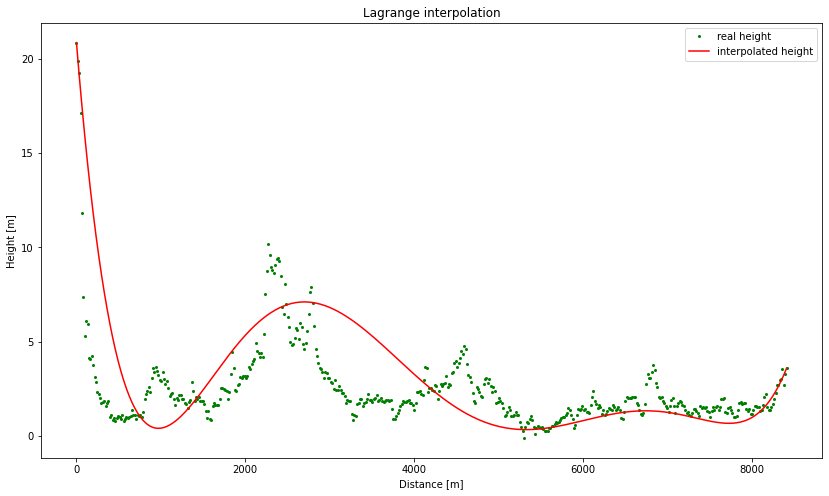

In [11]:
# points for lagrange interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=7)


all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)

plot_lagrange(all_points, all_points_interpolated_lagrange)

### Spline interpolation

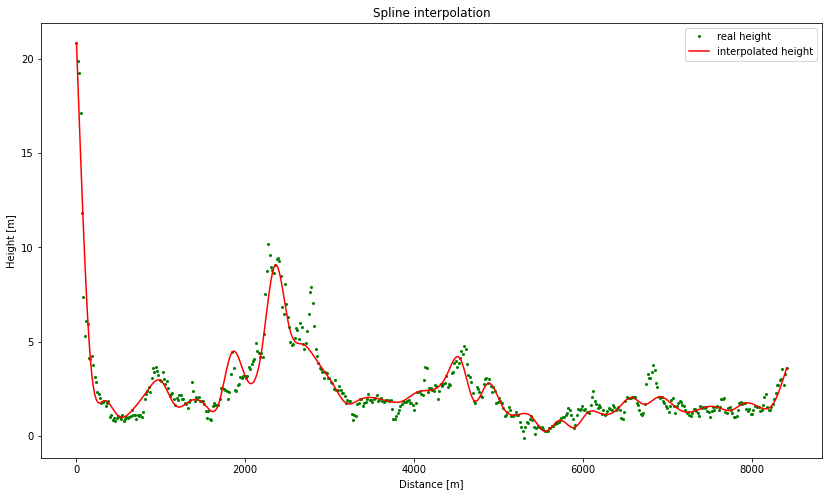

In [12]:
# points for spline interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=int(len(df)*0.1))

all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)

plot_spline(all_points, all_points_interpolated_spline)

### Errors

Lagrange interpolation RMSE

In [13]:
e = rmse(points_verify, verify_points_interpolated_lagrange)
print('RMSE for lagrange interpolation: {e} m'.format(e=round(e, 2)))

RMSE for lagrange interpolation: 2.6 m


Spline interpolation RMSE

In [14]:
e = rmse(points_verify, verify_points_interpolated_spline)
print('RMSE for spline interpolation: {e} m'.format(e=round(e, 2)))

RMSE for spline interpolation: 0.7 m


## Grand Canyon Colorado

In [15]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv')
df.columns = ['distance', 'height']

### Lagrange interpolation

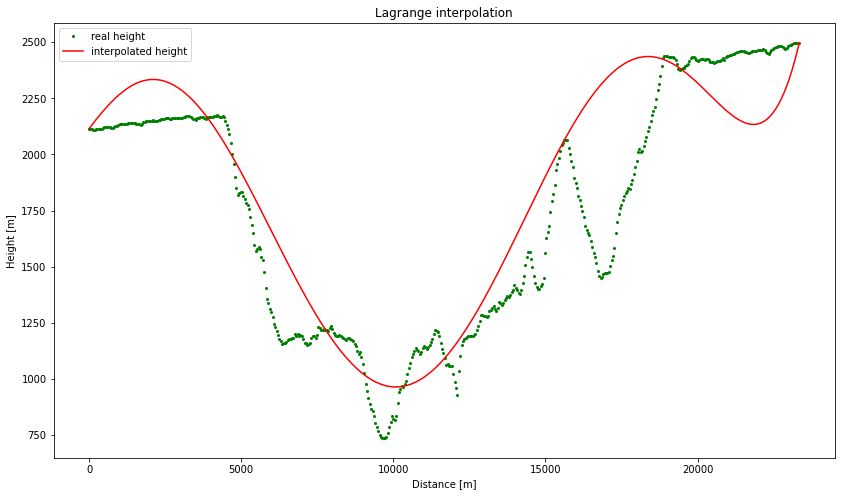

In [16]:
# points for lagrange interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=7)


all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)

plot_lagrange(all_points, all_points_interpolated_lagrange)

### Spline interpolation

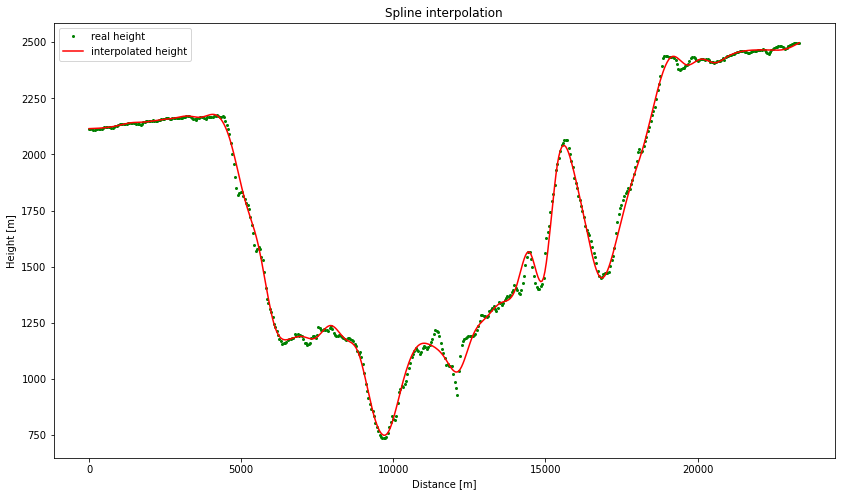

In [17]:
# points for spline interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=int(len(df)*0.1))

all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)

plot_spline(all_points, all_points_interpolated_spline)

### Errors

Lagrange interpolation RMSE

In [18]:
e = rmse(points_verify, verify_points_interpolated_lagrange)
print('RMSE for lagrange interpolation: {e} m'.format(e=round(e, 2)))

RMSE for lagrange interpolation: 222.85 m


Spline interpolation RMSE

In [19]:
e = rmse(points_verify, verify_points_interpolated_spline)
print('RMSE for spline interpolation: {e} m'.format(e=round(e, 2)))

RMSE for spline interpolation: 28.64 m


## Mount Everest

### Read data

In [20]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/MountEverest.csv')
df.columns = ['distance', 'height']

### Lagrange interpolation

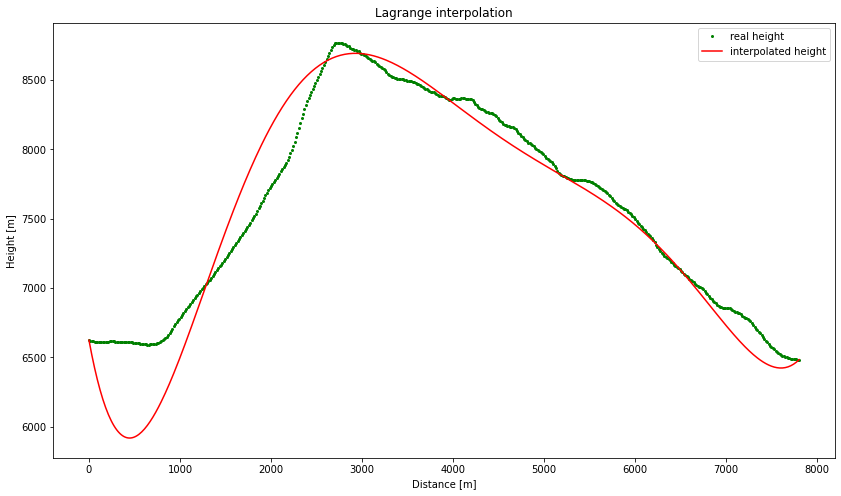

In [21]:
# points for lagrange interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=7)


all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)

plot_lagrange(all_points, all_points_interpolated_lagrange)

### Spline interpolation

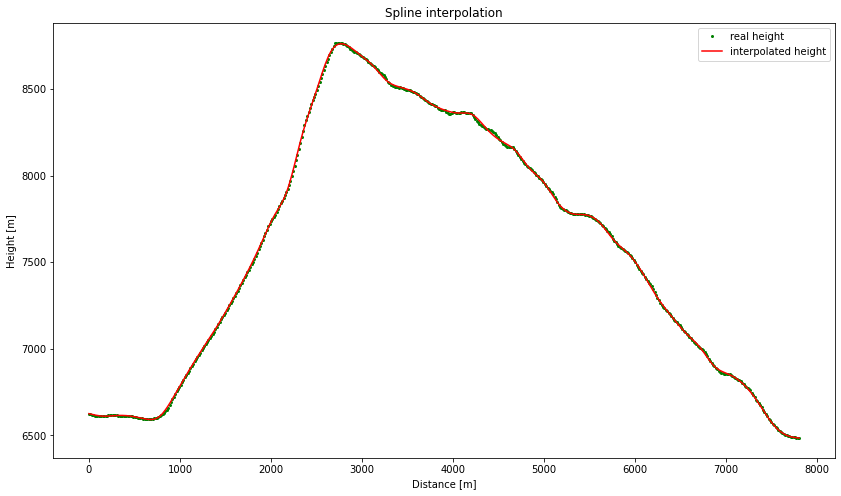

In [22]:
# points for spline interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=int(len(df)*0.1))

all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)

plot_spline(all_points, all_points_interpolated_spline)

### Errors

Lagrange interpolation RMSE

In [23]:
e = rmse(points_verify, verify_points_interpolated_lagrange)
print('RMSE for lagrange interpolation: {e} m'.format(e=round(e, 2)))

RMSE for lagrange interpolation: 275.96 m


Spline interpolation RMSE

In [24]:
e = rmse(points_verify, verify_points_interpolated_spline)
print('RMSE for spline interpolation: {e} m'.format(e=round(e, 2)))

RMSE for spline interpolation: 5.84 m


# Comparing how selection of points can change outcomes

## RMSE for different number of points

### Lagrange

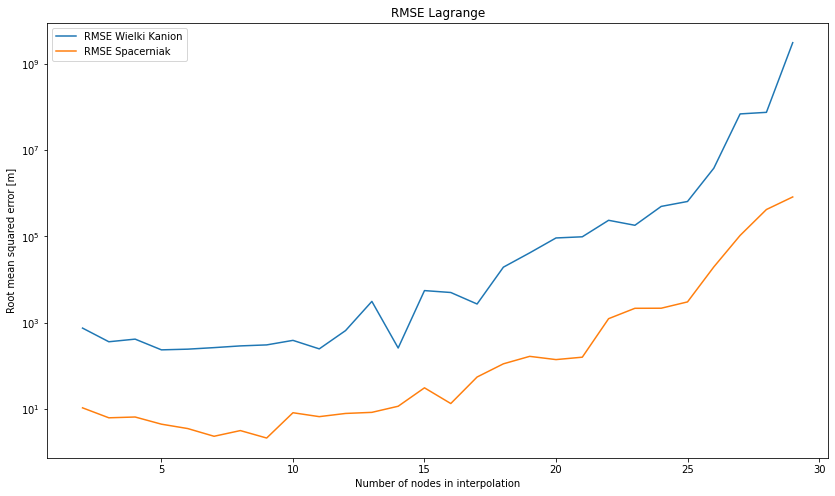

In [25]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv')
df.columns = ['distance', 'height']

num_nodes = list(range(2, 30))
e_grand_canion = []

for i in num_nodes:
    # points for lagrange interpolation
    all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=i)


    all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)
    e_grand_canion.append(rmse(points_verify, verify_points_interpolated_lagrange))

df = pd.read_csv('profile_wysokosciowe/2018_paths/SpacerniakGdansk.csv')
df.columns = ['distance', 'height']

e_spacerniak = []
for i in num_nodes:
    # points for lagrange interpolation
    all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=i)


    all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)
    
    e_spacerniak.append(rmse(points_verify, verify_points_interpolated_lagrange))


plt.semilogy(num_nodes, e_grand_canion, label='RMSE Wielki Kanion')
plt.semilogy(num_nodes, e_spacerniak, label='RMSE Spacerniak')
plt.title('RMSE Lagrange')
plt.xlabel('Number of nodes in interpolation')
plt.ylabel('Root mean squared error [m]')
plt.legend()
plt.show()

As we can see RMSE starts increasing after a few nodes. It's all due to Runge's phenomenon. You can't get satisfying results by increasing number of nodes used.

### Spline

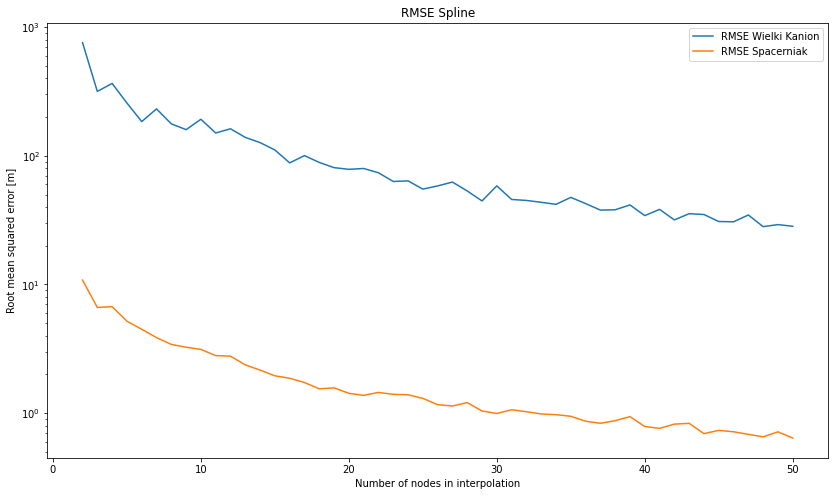

In [26]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv')
df.columns = ['distance', 'height']

num_nodes_canion = list(range(2, int(len(df)*0.1)))
e_grand_canion = []

for i in num_nodes_canion:
    # points for spline interpolation
    all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=i)

    all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)
    
    e_grand_canion.append(rmse(points_verify, verify_points_interpolated_spline))

    
    
df = pd.read_csv('profile_wysokosciowe/2018_paths/SpacerniakGdansk.csv')
df.columns = ['distance', 'height']

num_nodes_spacerniak = list(range(2, int(len(df)*0.1)))

e_spacerniak = []
for i in num_nodes_spacerniak:
    # points for spline interpolation
    all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=i)

    all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)
    
    e_spacerniak.append(rmse(points_verify, verify_points_interpolated_spline))


plt.semilogy(num_nodes_canion, e_grand_canion, label='RMSE Wielki Kanion')
plt.semilogy(num_nodes_spacerniak, e_spacerniak, label='RMSE Spacerniak')
plt.title('RMSE Spline')
plt.xlabel('Number of nodes in interpolation')
plt.ylabel('Root mean squared error [m]')
plt.legend()
plt.show()

On the other interpolating more nodes in spline method gives better results.

## RMSE for not uniform distribution of points

### Lagrange 7 nodes

In [66]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv')
df.columns = ['distance', 'height']

tries = 1000

# points for lagrange interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=7)

best_points_interpolated_lagrange_random = []

all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)

rmse_uniform = rmse(points_verify, verify_points_interpolated_lagrange)
rmse_random = []
for i in range(tries):
    all_points, points_interpolate, points_verify = split_points_random(df, number_of_nodes=7)


    all_points_interpolated_lagrange, verify_points_interpolated_lagrange = lagrange_interpolation(all_points, points_interpolate, points_verify)
    e = rmse(points_verify, verify_points_interpolated_lagrange)
    rmse_random.append(e)
    if e <= min(rmse_random):
        best_points_interpolated_lagrange_random = all_points_interpolated_lagrange

Best result random compared to uniform

In [67]:
print('Min RMSE random selection of points: {e} m'.format(e = round(min(rmse_random), 2)))
print('RMSE uniform selection of points: {e} m'.format(e = round(rmse_uniform, 2 )))


Min RMSE random selection of points: 160.76 m
RMSE uniform selection of points: 267.48 m


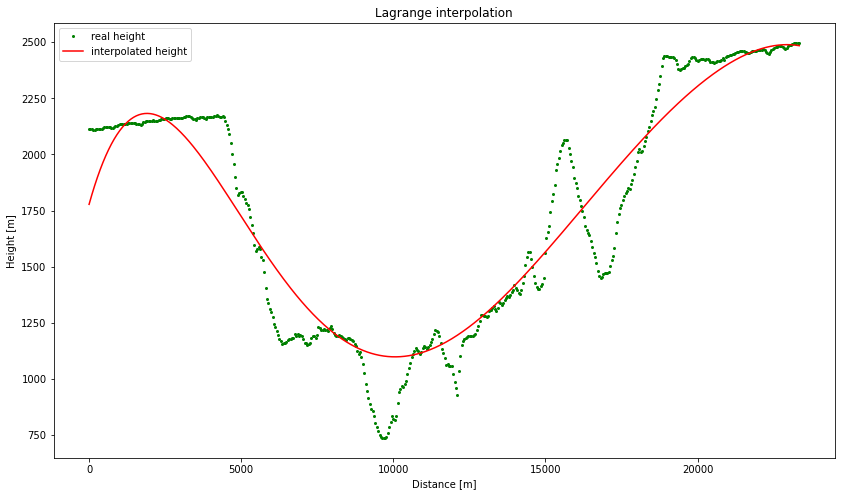

In [68]:
plot_lagrange(all_points, best_points_interpolated_lagrange_random)

As we can see there is great improvement over uniform distribution if we select best interpolation out of 1000 random ones.

## Spline

In [88]:
df = pd.read_csv('profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv')
df.columns = ['distance', 'height']

tries = 100

# points for spline interpolation
all_points, points_interpolate, points_verify = split_points_uniform(df, number_of_nodes=int(len(df)*0.1))

best_points_interpolated_spline_random = []

all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)

rmse_uniform = rmse(points_verify, verify_points_interpolated_spline)
rmse_random = []
for i in range(tries):
    all_points, points_interpolate, points_verify = split_points_random(df, number_of_nodes=int(len(df)*0.1))


    all_points_interpolated_spline, verify_points_interpolated_spline = spline_interpolation(all_points, points_interpolate, points_verify)
    
    e = rmse(points_verify, verify_points_interpolated_spline)
    rmse_random.append(e)
    if e <= min(rmse_random):
        best_points_interpolated_spline_random = all_points_interpolated_spline

Best result random compared to uniform

In [89]:
print('Min RMSE random selection of points: {e} m'.format(e = round(min(rmse_random), 2)))
print('RMSE uniform selection of points: {e} m'.format(e = round(rmse_uniform, 2 )))


Min RMSE random selection of points: 29.01 m
RMSE uniform selection of points: 28.64 m


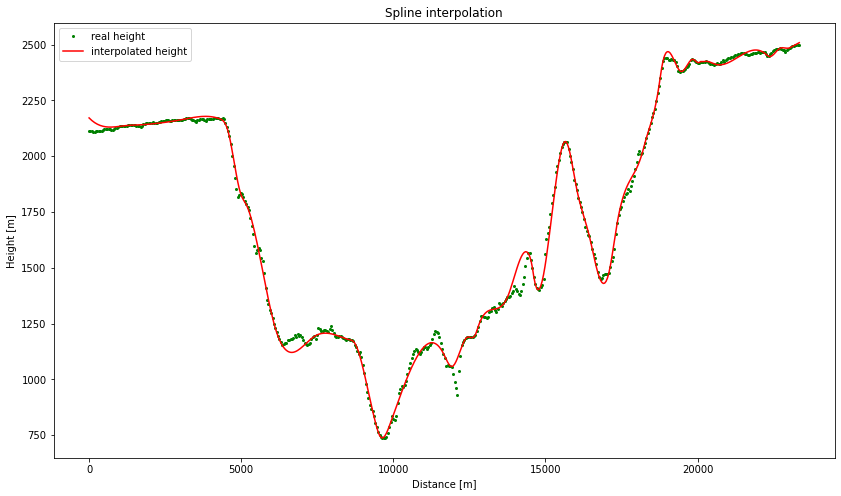

In [90]:
plot_spline(all_points, best_points_interpolated_spline_random)

As we can see it is more difficult to get better results for spline method.